In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
import plasticnet as pn
from splikes import day,hour,minute,second,ms
import splikes as sp
from splikes.utils import paramtext
from tqdm import tqdm

In [3]:
total_time=10*second
N=5

In [22]:
patterns=array([15.,]*N)
pre=sp.neurons.poisson_pattern(patterns)
post=sp.neurons.IntegrateAndFire(N)
w=sp.connection(pre,post,[0,0],state='V')

In [23]:
w.reset_to_initial=True
np.fill_diagonal(w.initial_weights,1)

In [35]:
pre.save_spikes_begin=0.0
pre.save_spikes_end=total_time

post.save_spikes_begin=0.0
post.save_spikes_end=total_time

In [36]:
sim=sp.simulation(total_time,dt=0.0001)

In [37]:
sim.monitor(post,['V',],0.001)

In [38]:
sp.run_sim(sim,[pre,post],[w])

('Time Elapsed...', '0.07 s')


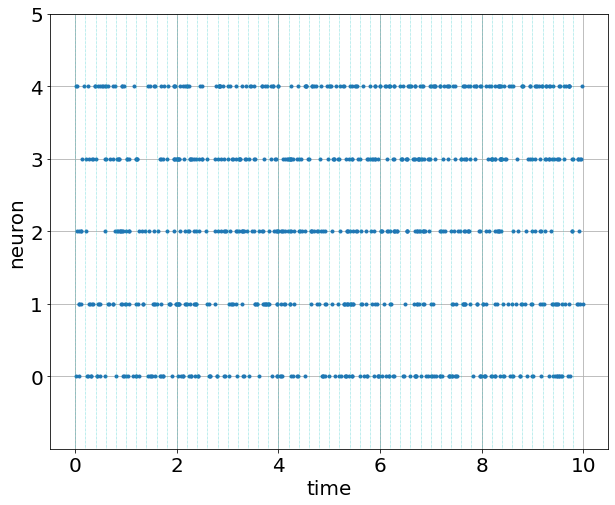

In [39]:
pre.plot_spikes()

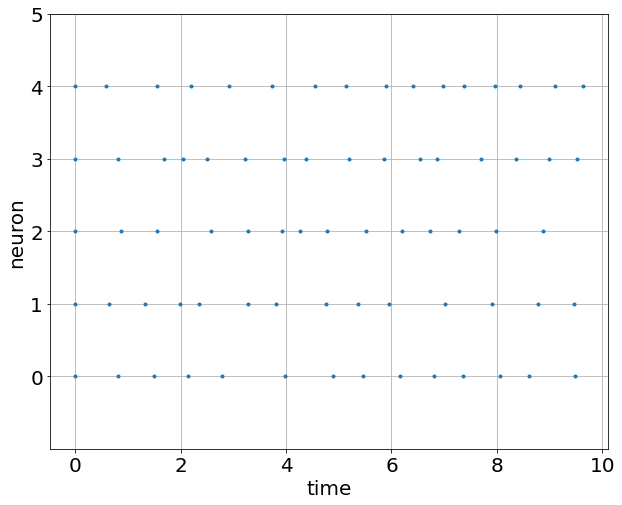

In [41]:
post.plot_spikes()

In [42]:
t,V=sim.monitors['V'].arrays()

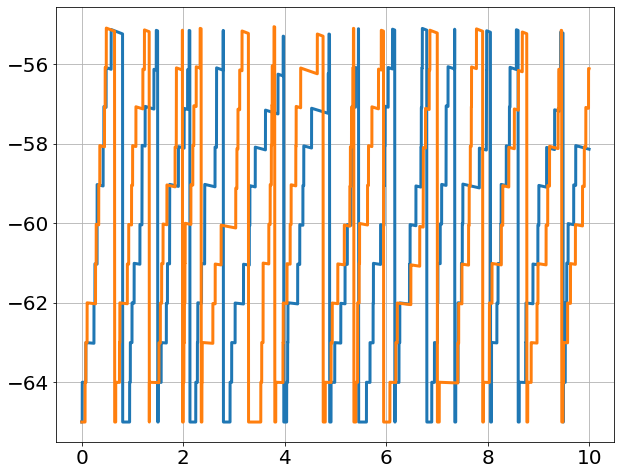

In [43]:
plot(t,V[:,0:2])

## One Neuron Integrate and Fire

In [76]:
rate=10
total_time=10
pre=sp.neurons.poisson_pattern([rate])
post=sp.neurons.IntegrateAndFire(1)
w=sp.connection(pre,post,[1,1],state='V')
sim=sp.simulation(total_time,dt=0.0001)

pre.save_spikes_begin=0.0
pre.save_spikes_end=total_time

post.save_spikes_begin=0.0
post.save_spikes_end=total_time    
sim.monitor(post,['V',],0.001)

sp.run_sim(sim,[pre,post],[w],print_time=False)


(0.0001, 10.000099999990033)

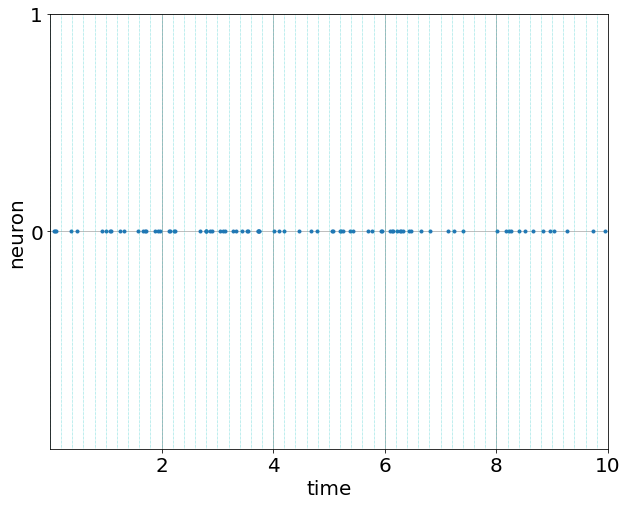

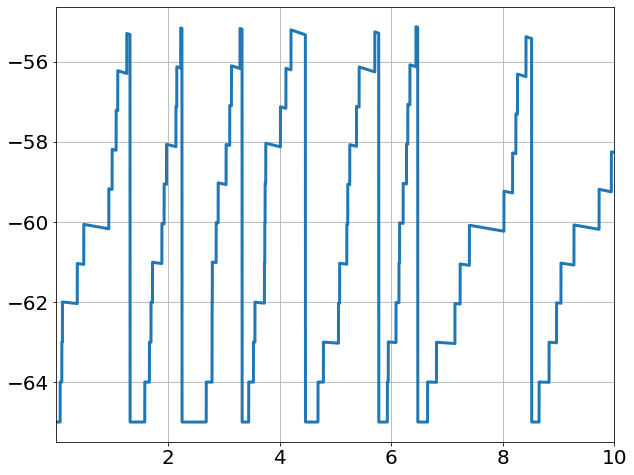

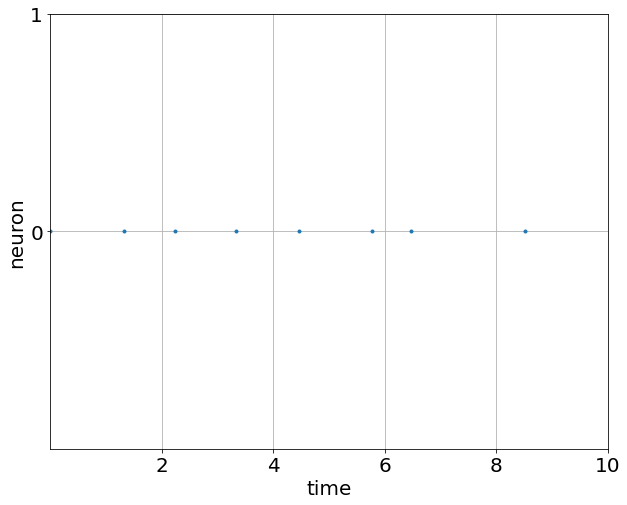

In [77]:
t,V=sim.monitors['V'].arrays()

figure()
pre.plot_spikes()
xlim([min(t),max(t)])


figure()
plot(t,V)
xlim([min(t),max(t)])

figure()
post.plot_spikes()
xlim([min(t),max(t)])


## Input/Output Rate Relationship

100%|█████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 42.49it/s]


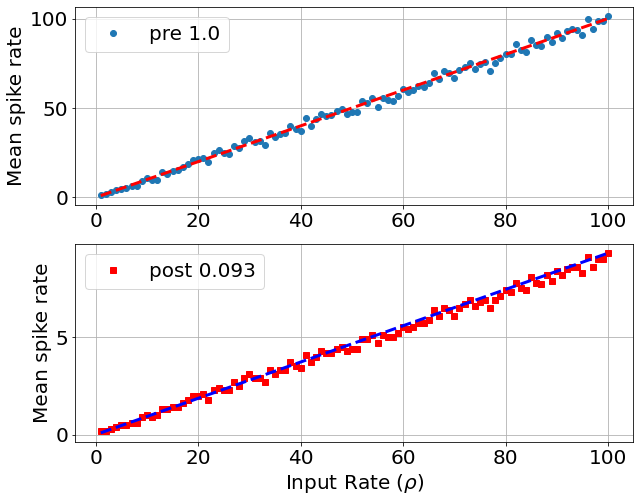

In [97]:
rate_arr=linspace(1,100,100)


mean_pre_arr=[]
mean_post_arr=[]

total_time=10
for rate in tqdm(rate_arr):
    
    pre=sp.neurons.poisson_pattern([rate])
    post=sp.neurons.IntegrateAndFire(1)
    
    w=sp.connection(pre,post,[1,1],state='V')
    
    sim=sp.simulation(total_time,dt=0.0001)
    
    pre.save_spikes_begin=0.0
    pre.save_spikes_end=total_time

    post.save_spikes_begin=0.0
    post.save_spikes_end=total_time    
    
    
    sp.run_sim(sim,[pre,post],[w],print_time=False)
    
    mean_pre_arr.append(len(pre.saved_spikes)/total_time)
    mean_post_arr.append(len(post.saved_spikes)/total_time)
    
subplot(2,1,1)    
m=mean(array(mean_pre_arr)/rate_arr)
plot(rate_arr,mean_pre_arr,'o',label=f'pre {m:0.2}')
ylabel('Mean spike rate')
plot(rate_arr,rate_arr,'r--')
legend()


subplot(2,1,2)    
m=mean(array(mean_post_arr)/rate_arr)
plot(rate_arr,mean_post_arr,'rs',label=f'post {m:0.2}')
xlabel(r'Input Rate ($\rho$)')
ylabel('Mean spike rate')

plot(rate_arr,m*rate_arr,'b--')

legend()



100%|█████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 41.67it/s]


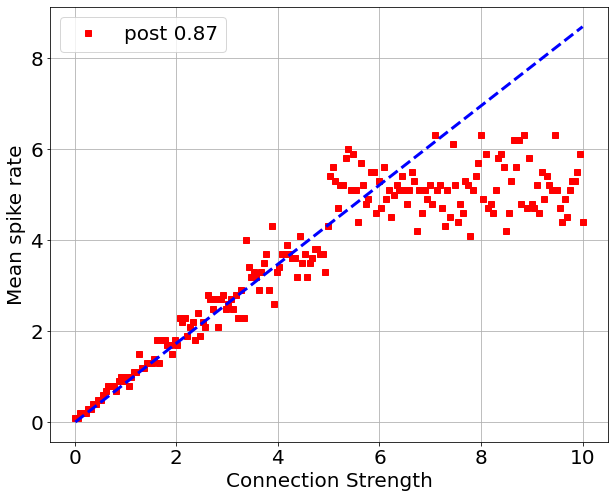

In [102]:
w_arr=linspace(0.01,10,200)
rate=10


mean_pre_arr=[]
mean_post_arr=[]

total_time=10
for w_val in tqdm(w_arr):
    
    pre=sp.neurons.poisson_pattern([rate])
    post=sp.neurons.IntegrateAndFire(1)
    
    w=sp.connection(pre,post,[w_val,w_val],state='V')
    
    sim=sp.simulation(total_time,dt=0.0001)
    
    pre.save_spikes_begin=0.0
    pre.save_spikes_end=total_time

    post.save_spikes_begin=0.0
    post.save_spikes_end=total_time    
    
    
    sp.run_sim(sim,[pre,post],[w],print_time=False)
    
    mean_pre_arr.append(len(pre.saved_spikes)/total_time)
    mean_post_arr.append(len(post.saved_spikes)/total_time)
    
m=mean(array(mean_post_arr)/w_arr)
plot(w_arr,mean_post_arr,'rs',label=f'post {m:0.2}')
xlabel(r'Connection Strength')
ylabel('Mean spike rate')

plot(w_arr,m*w_arr,'b--')

legend()



# SRM0

In [107]:
rate=1
total_time=10
pre=sp.neurons.poisson_pattern([rate])
post=sp.neurons.srm0(1)
post.tau=0.1
post.a=10.0

w=sp.connection(pre,post,[1,1])
sim=sp.simulation(total_time,dt=0.0001)

pre.save_spikes_begin=0.0
pre.save_spikes_end=total_time

post.save_spikes_begin=0.0
post.save_spikes_end=total_time    
sim.monitor(post,['u','v',],0.001)

sp.run_sim(sim,[pre,post],[w],print_time=False)


(0.0001, 10.000099999990033)

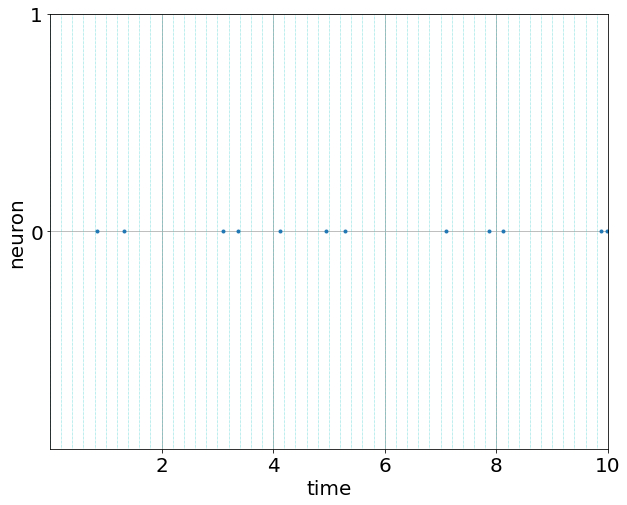

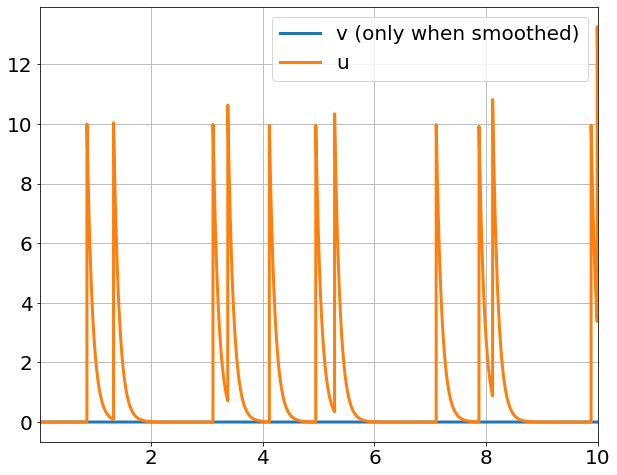

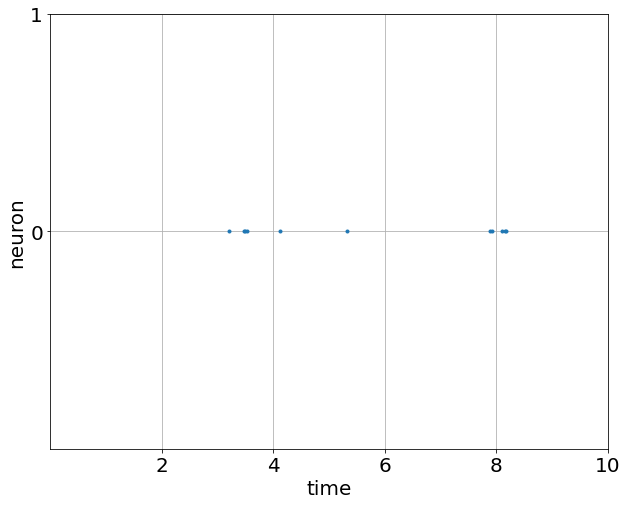

In [111]:
t,v=sim.monitors['v'].arrays()
t,u=sim.monitors['u'].arrays()

figure()
pre.plot_spikes()
xlim([min(t),max(t)])


figure()
plot(t,v,label='v (only when smoothed)')
plot(t,u,label='u')
xlim([min(t),max(t)])
legend()

figure()
post.plot_spikes()
xlim([min(t),max(t)])


In [112]:
rate=1
total_time=10
pre=sp.neurons.poisson_pattern([rate])
post=sp.neurons.srm0(1)
post.tau=0.1
post.a=10.0
post.smoothed=True

w=sp.connection(pre,post,[1,1])
sim=sp.simulation(total_time,dt=0.0001)

pre.save_spikes_begin=0.0
pre.save_spikes_end=total_time

post.save_spikes_begin=0.0
post.save_spikes_end=total_time    
sim.monitor(post,['u','v',],0.001)

sp.run_sim(sim,[pre,post],[w],print_time=False)


(0.0001, 10.000099999990033)

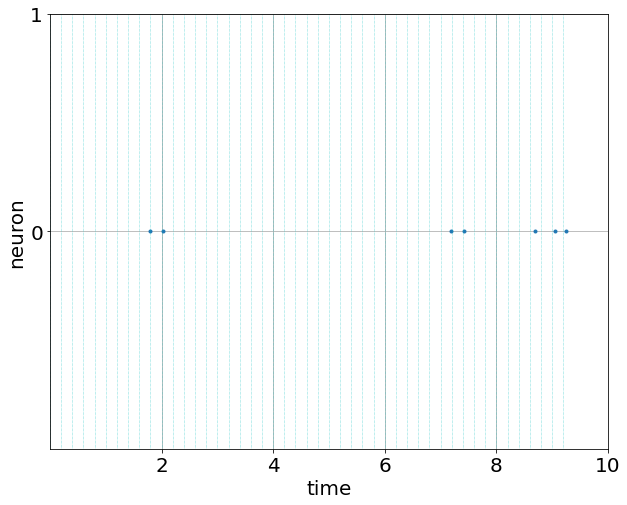

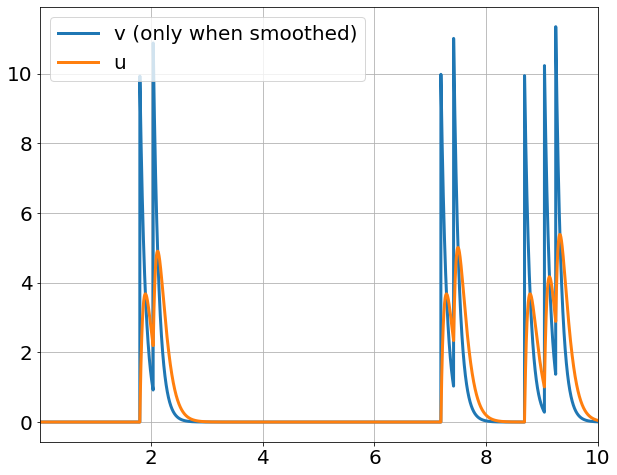

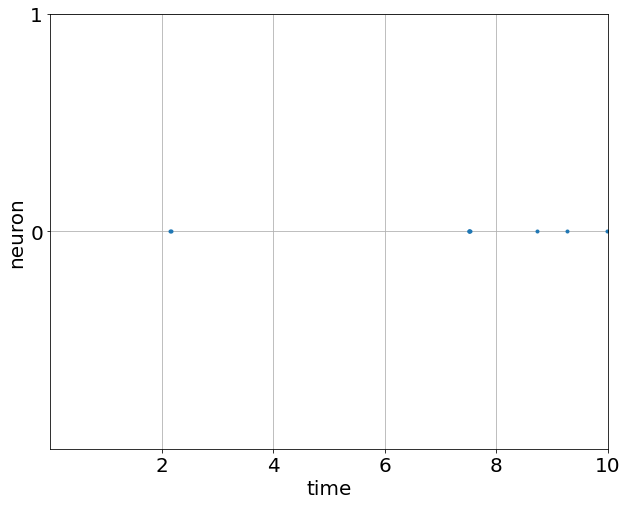

In [113]:
t,v=sim.monitors['v'].arrays()
t,u=sim.monitors['u'].arrays()

figure()
pre.plot_spikes()
xlim([min(t),max(t)])


figure()
plot(t,v,label='v (only when smoothed)')
plot(t,u,label='u')
xlim([min(t),max(t)])
legend()

figure()
post.plot_spikes()
xlim([min(t),max(t)])
